In [1]:
import pandas as pd
import numpy as np

from importlib import reload

import plotly
import plotly.graph_objs as go
%matplotlib inline

In [2]:
import gameplan.helpers as hp
# import gameplan.income_streams
# import gameplan.expenses
# import gameplan.user
# import gameplan.cashflows
# import gameplan.assets

# reload(gameplan.helpers)
# reload(gameplan.income_streams)
# reload(gameplan.expenses)
# reload(gameplan.user)
# reload(gameplan.cashflows)
# reload(gameplan.assets)
from gameplan.income_streams import IncomeStream, Salary
from gameplan.user import User
# from gameplan.cashflows import CashFlow
# from gameplan.assets import Contribution, CashSavings

import gameplan

In [3]:
usr = User('example@gmail.com')
usr.user_id

'1022232228'

In [4]:
s = Salary(120000/24, payday_freq='SM', next_paycheck_dt=hp.get_offset_date('SM', pd.datetime.today()))

Annual salary is $120,000


,salary
2020-05-15,5000.0
2020-05-31,5000.0
2020-06-15,5000.0
2020-06-30,5000.0
2020-07-15,5000.0


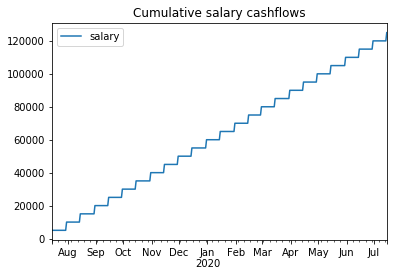

In [5]:
print(f"Annual salary is ${s.annualized_salary:,.0f}")
s.plot_cash_flows(cumulative=True, title='Cumulative salary cashflows')
s.cash_flows_df.tail()

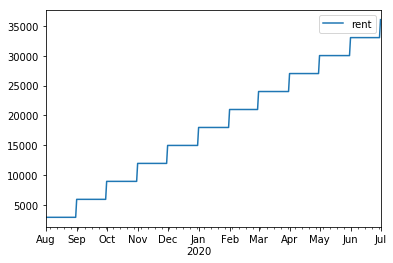

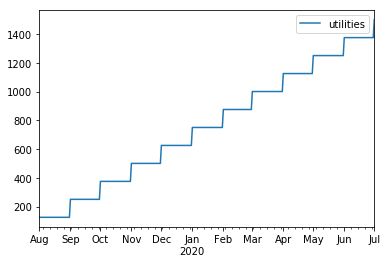

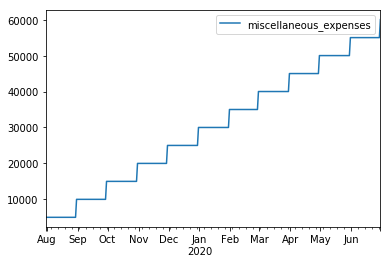

In [6]:
r = gameplan.expenses.Rent(3000)
u = gameplan.expenses.Utilities(125)
misc = gameplan.expenses.Expense(
    expense_type='miscellaneous_expenses', 
    amount=5000, 
    recurring=True, 
    start_dt=pd.datetime.today(),
    freq='M'
)

expenses = [r, u, misc]
for exp in expenses: 
    exp.plot_cash_flows()

In [7]:
usr.add_income_stream(s)
for exp in expenses:
    usr.add_expense(exp)

In [8]:
usr.all_cashflows.agg_cash_flows('Q')

,salary,rent,utilities,miscellaneous_expenses,total_net_cash_flow
2019-09-30,30000.0,-6000.0,-250.0,-15000.0,8750.0
2019-12-31,30000.0,-9000.0,-375.0,-15000.0,5625.0
2020-03-31,30000.0,-9000.0,-375.0,-15000.0,5625.0
2020-06-30,30000.0,-9000.0,-375.0,-15000.0,5625.0
2020-09-30,5000.0,-3000.0,-125.0,0.0,1875.0


In [9]:
usr.all_cashflows.total.head()

2019-07-15    5000.0
2019-07-31       0.0
2019-08-01   -3125.0
2019-08-15    5000.0
2019-08-31       0.0
Name: total_net_cash_flow, dtype: float64

In [10]:
usr.all_cashflows.agg_cash_flows('D').head()

,salary,rent,utilities,miscellaneous_expenses,total_net_cash_flow
2019-07-15,5000.0,0.0,0.0,0.0,5000.0
2019-07-16,0.0,0.0,0.0,0.0,0.0
2019-07-17,0.0,0.0,0.0,0.0,0.0
2019-07-18,0.0,0.0,0.0,0.0,0.0
2019-07-19,0.0,0.0,0.0,0.0,0.0


In [11]:
usr.expenses.total.tail()

2020-05-01   -3125.0
2020-05-31   -5000.0
2020-06-01   -3125.0
2020-06-30   -5000.0
2020-07-01   -3125.0
Name: total_net_expense, dtype: float64

In [12]:
usr.income_streams.total.tail()

2020-05-15    5000.0
2020-05-31    5000.0
2020-06-15    5000.0
2020-06-30    5000.0
2020-07-15    5000.0
Freq: SM-15, Name: total_net_income_stream, dtype: float64

In [13]:
usr.all_cashflows.as_df.head()

,salary,rent,utilities,miscellaneous_expenses,total_net_cash_flow
2019-07-15,5000.0,0.0,0.0,0.0,5000.0
2019-07-31,5000.0,0.0,0.0,-5000.0,0.0
2019-08-01,0.0,-3000.0,-125.0,0.0,-3125.0
2019-08-15,5000.0,0.0,0.0,0.0,5000.0
2019-08-31,5000.0,0.0,0.0,-5000.0,0.0


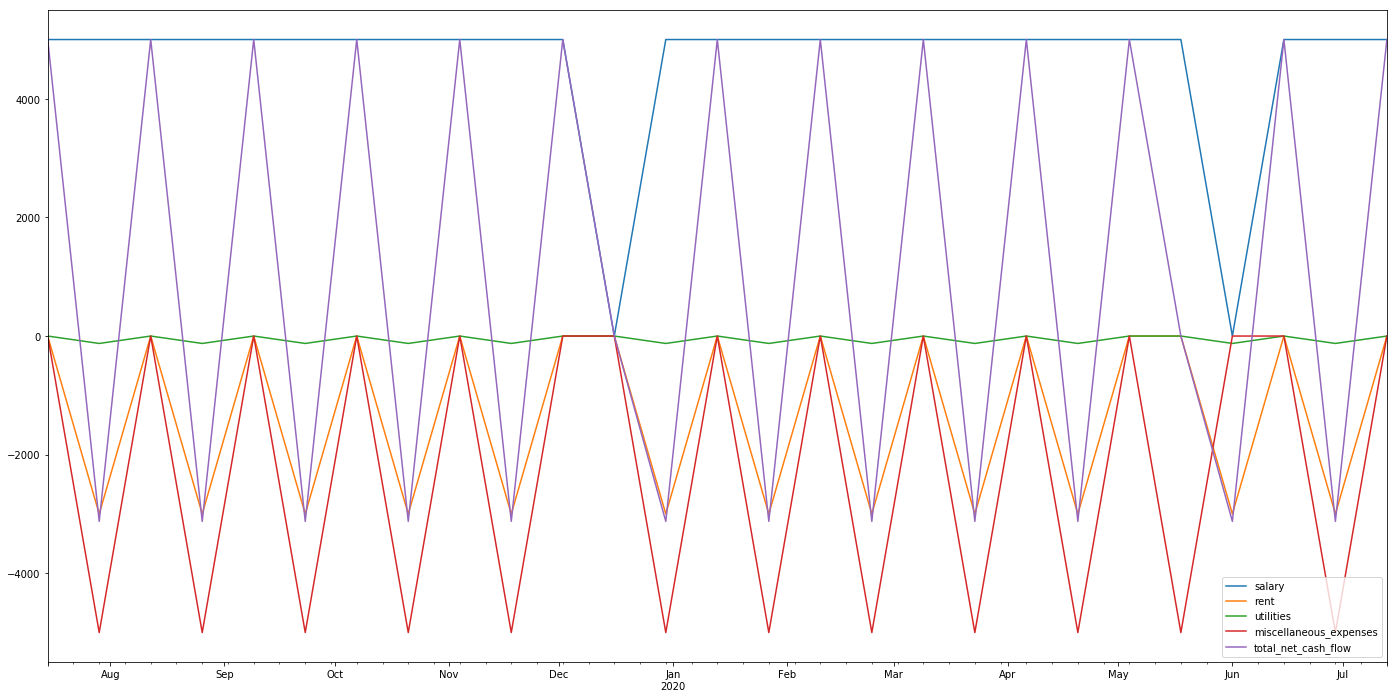

In [14]:
usr.all_cashflows.agg_cash_flows('14D').plot(figsize=(24,12))

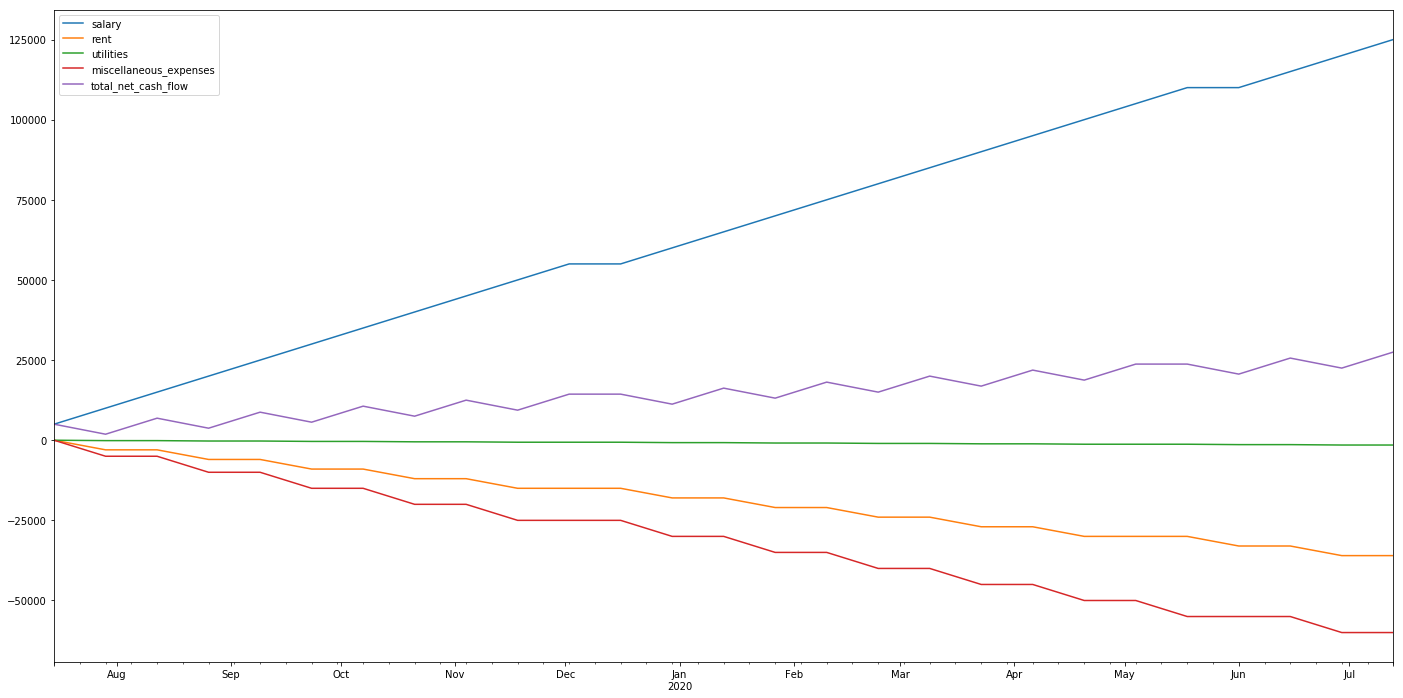

In [15]:
usr.all_cashflows.agg_cash_flows('14D').cumsum().plot(figsize=(24,12))

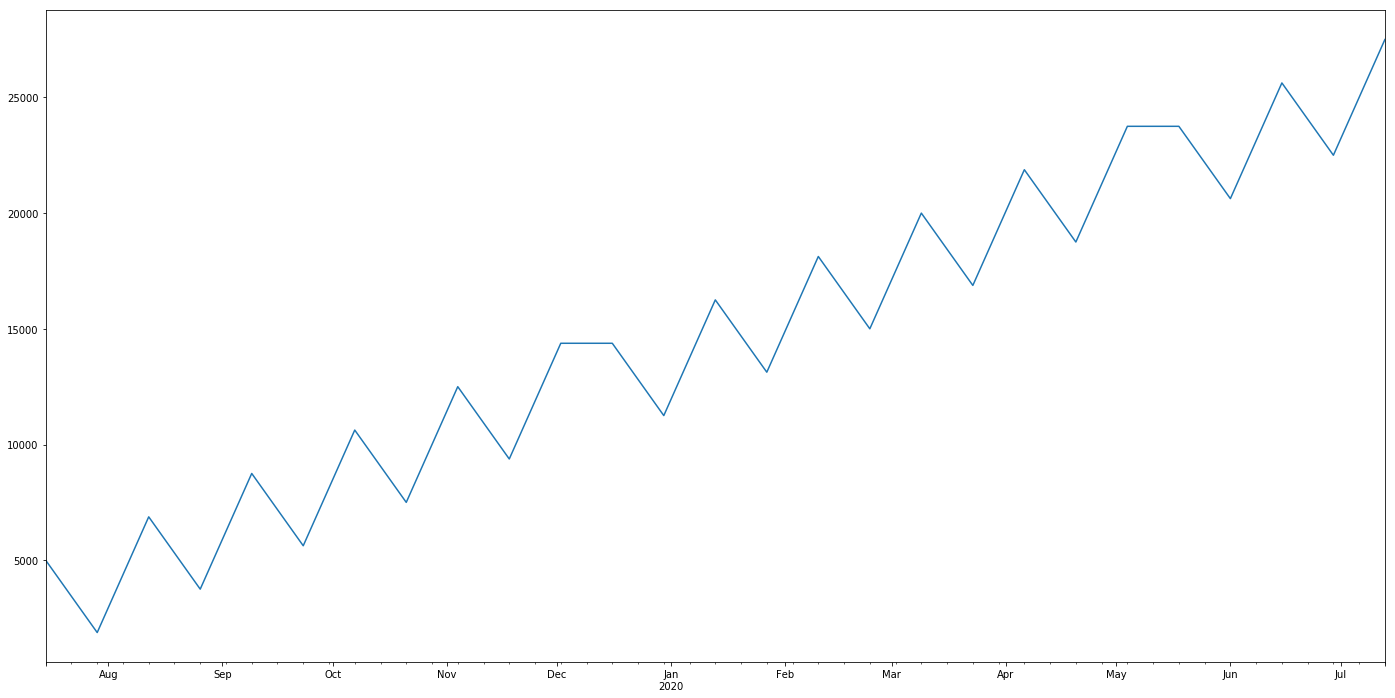

In [16]:
usr.all_cashflows.agg_cash_flows('14D').cumsum()['total_net_cash_flow'].plot(figsize=(24,12))

In [17]:
gameplan.contributions.Contribution.from_income_stream(s, pct=.05)

In [18]:
from gameplan.contributions import Contribution
from gameplan.assets import CashSavings

In [19]:
c = Contribution.from_income_stream(s, pct=0.05, label='salary_5%')

In [20]:
cs = CashSavings(initial_balance=12000, annualized_interest_rate=0.024)

In [21]:
cs.contributions.add_object(c, label='salary_5')

In [22]:
cs.contributions.as_df

,initial_balance,salary_5%,total_net_contribution
2019-07-06,12000.0,0.0,12000.0
2019-07-15,0.0,250.0,250.0
2019-07-31,0.0,250.0,250.0
2019-08-15,0.0,250.0,250.0
2019-08-31,0.0,250.0,250.0
2019-09-15,0.0,250.0,250.0
2019-09-30,0.0,250.0,250.0
2019-10-15,0.0,250.0,250.0
2019-10-31,0.0,250.0,250.0
2019-11-15,0.0,250.0,250.0


In [23]:
cs.value_through_time

2019-07-06    12000.000000
2019-07-15    12257.098608
2019-07-31    12519.991697
2019-08-15    12782.337814
2019-08-31    13045.783396
2019-09-15    13308.648001
2019-09-30    13571.771821
2019-10-15    13835.155111
2019-10-31    14099.708138
2019-11-15    14363.612032
2019-11-30    14627.776164
2019-12-15    14892.200793
2019-12-31    15157.865713
2020-01-15    15422.813069
2020-01-31    15689.036134
2020-02-15    15954.507284
2020-02-29    16219.190873
2020-03-15    16485.184814
2020-03-31    16752.525375
2020-04-15    17019.045244
2020-04-30    17285.827932
2020-05-15    17552.873697
2020-05-31    17821.337346
2020-06-15    18088.911184
2020-06-30    18356.748880
2020-07-15    18624.850693
Name: total_value, dtype: float64

## Testing/Scratchwork

In [26]:
# Fixed payments - Lets assume you want to pay XX per month
# Minimum payments - Lets assume you make minimum payments
# Goal-based - Lets assume you want to pay back w/in XX years


In [27]:
iss = InterestRateSeries(.063, name='6.3% Fixed Rate', freq='M')

NameError: name 'InterestRateSeries' is not defined

In [88]:
# sd = StudentDebt(30000, 0.055)

In [ ]:
# TO DO:
1. (Maybe) Allow CashFlow to be instantiated w/ an existing CashFlow? A Series w/ variable $ amount?
2. CashFlows should be able to grow (change) through time rather than being fixed
# 3. Instantiate CashFlow from a series

In [24]:
from gameplan.assets import CashSavings

In [25]:
cash = CashSavings(initial_balance=20000)

In [26]:
from gameplan.contributions import Contribution

In [27]:
cash.contributions.add_object(Contribution.from_income_stream(s, pct=.12, label='salary_savings_2'))

In [ ]:
# All Net Positive cashflows go to cash savings

In [28]:
def add_2(x): return x + 2

In [29]:
class Test():
    def __init__(self, val=0):
        self.val = val
        setattr(self, 'plus_2', add_2(self.val))

In [30]:
tst = Test(val=2)

In [31]:
tst.val = 5

In [70]:
cashflows.loan.fixed_rate_loan(12000, .045, 30, pd.datetime.today())

/Users/davidbrodsky/.pyenv/versions/3.7.3/envs/db_env/lib/python3.7/site-packages/cashflows/loan.py:40: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,Beg_Ppal_Amount,Nom_Rate,Tot_Payment,Int_Payment,Ppal_Payment,End_Ppal_Amount
2019,12000.000000,0.045,0.000000,0.000000,0.000000,1.200000e+04
2020,12000.000000,0.045,402.796067,5.400000,397.396067,1.160260e+04
2021,11602.603933,0.045,402.796067,5.221172,397.574895,1.120503e+04
2022,11205.029038,0.045,402.796067,5.042263,397.753804,1.080728e+04
2023,10807.275234,0.045,402.796067,4.863274,397.932793,1.040934e+04
2024,10409.342441,0.045,402.796067,4.684204,398.111863,1.001123e+04
2025,10011.230578,0.045,402.796067,4.505054,398.291013,9.612940e+03
2026,9612.939565,0.045,402.796067,4.325823,398.470244,9.214469e+03
2027,9214.469321,0.045,402.796067,4.146511,398.649556,8.815820e+03
2028,8815.819766,0.045,402.796067,3.967119,398.828948,8.416991e+03


In [33]:
# Portfolio = [
# Consumption,
# Debt servicing costs
# IncomeStreams = active (salary) + passive (asset-based),


# Assets,
# Liabilities 
# ]

In [35]:
from gameplan.collections import Collection, Expenses, IncomeStreams, CashFlowCollection
from gameplan.assets import Asset, CashSavings
from gameplan.liabilities import Liability
from gameplan.cashflows import CashFlow
# from gameplan.expenses import Expense

class Portfolio():
    def __init__(self, initial_cash_savings=0, interest_rate=0, time_horizon=):
        self.assets = Collection(collection_type=Asset, objects=dict(
            initial_savings=CashSavings(initial_balance=initial_cash_savings, annualized_interest_rate=interest_rate)
        ))
        self.liablities = Collection(collection_type=Liability, objects={})
        self.income_streams = IncomeStreams(income_streams={}) # includes salary, etc.
        self.consumption = Expenses(expenses={}) #+ ...

    
    def add_income_stream(self, income_stream, label=None, if_exists='error'):
        self.income_streams.add_object(income_stream, label, if_exists)


    def add_expense(self, expense, label=None, if_exists='error'):
        self.consumption.add_object(expense, label, if_exists)


    def add_asset(self, asset, label=None, if_exists='error'):
        self.assets.add_object(asset, label, if_exists)
        
    def add_liability(self, liability, label=None, if_exists='error'):
        self.liabilities.add_object(liability, label, if_exists)
        
        
    @property
    def income_streams_from_assets(self):
        ## You may wanna rip out the interest accumulation from CashSavings, put that as a property on Assets 
        ## or at least interest bearing assets
        pass
#         return {}

    @property
    def debt_service_from_liabilities(self):
        pass
#         return {}

    def transfer_value(from_x, to_y, amt=None, pct=None):
        pass
    
    @property
    def portfolio_cashflows(self):
        return CashFlowCollection(
            collection_type=CashFlow,
            objects=[
                self.income_streams_from_assets, 
                self.debt_service_from_liabilities,
                self.income_streams.contents,
                self.consumption.contents 
            ]
        )
        
    
    @property
    def portfolio_pv(self): # aka net_worth?
#         assets.pv + liabilibilities.pv + income_streams.pv + consumption.pv
        pass
    
    
    def simulate_portfolio_value(self):
        pass
    
    def plot_portfolio_value(self):
        pass
    
    #TO DO: Each of these functions should probs be defined at the IncomeStream/Asset/Liability/Expense level as well?
    #TO DO: Add functionality to add objects to each of the collections (i.e. add asset/liability//etc.)

In [48]:
b = a.portfolio_cashflows

In [51]:
cont_to_cash = b.agg_cash_flows('D').total_net_cash_flow

In [ ]:
b.

In [ ]:
def income_stream_to_cash(income_stream, cash_account, contrib_pct, date_range, label=None):
    transfer_values = [contrib_pct * x for x in income_stream.values]
    c = Contribution(label, date_range, values=transfer_values)
    income_stream.values = (pd.Series(income_stream.values) - pd.Series(transfer_values)).values
    cash_account.contributions.add_object(c, label=label)
    
    

In [56]:
# a.assets.contents[]
cashflow_cash = CashSavings(annualized_interest_rate=0.001)
# cashflow_cash.
cashflow_cash.add_contribution(
    Contribution('cashflows', date_range=cont_to_cash.index, values=cont_to_cash.values)
)

In [58]:
a.add_asset(cashflow_cash)

In [ ]:
a.assets.

In [46]:
a = Portfolio(initial_cash_savings=12000, interest_rate=0.015)
a.add_income_stream(s, label='salary')
for e in expenses:
    a.add_expense(e)


In [47]:
a.portfolio_cashflows.as_df.head()

,salary,rent,utilities,miscellaneous_expenses,total_net_cash_flow
2019-07-15,5000.0,0.0,0.0,0.0,5000.0
2019-07-31,5000.0,0.0,0.0,-5000.0,0.0
2019-08-01,0.0,-3000.0,-125.0,0.0,-3125.0
2019-08-15,5000.0,0.0,0.0,0.0,5000.0
2019-08-31,5000.0,0.0,0.0,-5000.0,0.0


In [ ]:
a.

In [45]:
a.assets.contents['initial_savings'].value_through_time

2019-07-06    12000
Freq: D, Name: total_value, dtype: int64

In [217]:
t_from = s
t_to = CashSavings(initial_balance=40)
pct = .05
date_range = s.date_range
label='from_sal'

In [ ]:
# input_dict = {a}

In [ ]:
print(t_from.cash_flows_df.head())
print(t_to.contributions.head())

In [234]:
transfer_values = [pct * x for x in t_from.values]
c = Contribution(label, date_range, values=transfer_values)
t_from.values = (pd.Series(t_from.values) - pd.Series(transfer_values)).values
t_to.contributions.add_object(c, label=label)

In [238]:
def income_stream_to_cash(income_stream, cash_account, contrib_pct, date_range, label=None):
    transfer_values = [contrib_pct * x for x in income_stream.values]
    c = Contribution(label, date_range, values=transfer_values)
    income_stream.values = (pd.Series(income_stream.values) - pd.Series(transfer_values)).values
    cash_account.contributions.add_object(c, label=label)
    
    

In [240]:
print(s.cash_flows_df.head())
print(t_to.contributions.as_df.head())

            salary
2019-07-31  4500.0
2019-08-31  4500.0
2019-09-30  4500.0
2019-10-31  4500.0
2019-11-30  4500.0


AttributeError: 'NoneType' object has no attribute 'head'

In [242]:
s1, cs1 = income_stream_to_cash(s, t_to, 0.075, s.date_range, label='test')

In [ ]:
def compound_interest(principal, rate, times_per_year, years):
    # (1 + r/n)
    body = 1 + (rate / times_per_year)
    # nt
    exponent = times_per_year * years
    # P(1 + r/n)^nt
    return principal * pow(body, exponent)

In [244]:
print(s.cash_flows_df.head())
print(t_to.contributions.total.head())

            salary
2019-07-31  4162.5
2019-08-31  4162.5
2019-09-30  4162.5
2019-10-31  4162.5
2019-11-30  4162.5
2019-07-31    337.5
2019-08-31    337.5
2019-09-30    337.5
2019-10-31    337.5
2019-11-30    337.5
Freq: M, Name: total_net_contribution, dtype: float64


In [241]:
t_to.contributions.as_df

In [232]:
t_from.values = (pd.Series(t_from.values) - pd.Series(transfer_values)).values

In [233]:
t_from.cash_flows_df

,salary
2019-07-31,4500.0
2019-08-31,4500.0
2019-09-30,4500.0
2019-10-31,4500.0
2019-11-30,4500.0
2019-12-31,4500.0
2020-01-31,4500.0
2020-02-29,4500.0
2020-03-31,4500.0
2020-04-30,4500.0


In [231]:
t_from_new = t_from.values 

In [224]:
(pd.Series(t_from.values) - pd.Series(transfer_values))

0     4750.0
1     4750.0
2     4750.0
3     4750.0
4     4750.0
5     4750.0
6     4750.0
7     4750.0
8     4750.0
9     4750.0
10    4750.0
11    4750.0
12    4750.0
dtype: float64

In [220]:
transfer

2019-07-31    250.0
2019-08-31    250.0
2019-09-30    250.0
2019-10-31    250.0
2019-11-30    250.0
2019-12-31    250.0
2020-01-31    250.0
2020-02-29    250.0
2020-03-31    250.0
2020-04-30    250.0
2020-05-31    250.0
2020-06-30    250.0
2020-07-31    250.0
Freq: M, Name: from_sal, dtype: float64

In [215]:
c = Contribution(contribution_label='from_sal', date_range=date_range, values=)


In [216]:
c.cash_flows_df

,from_sal
2019-07-31,250.0
2019-08-31,250.0
2019-09-30,250.0
2019-10-31,250.0
2019-11-30,250.0
2019-12-31,250.0
2020-01-31,250.0
2020-02-29,250.0
2020-03-31,250.0
2020-04-30,250.0


In [168]:
i_r = cf.interest_rate(0.01, start=s.start_dt, end=s.end_dt, freq=s.freq)
cf.analysis.timevalue(s.cash_flows_df.to, prate=i_r)

ValueError: Argument must be a list:             salary
2019-07-31     NaN
2019-08-31     NaN
2019-09-30     NaN
2019-10-31     NaN
2019-11-30     NaN
2019-12-31     NaN
2020-01-31     NaN
2020-02-29     NaN
2020-03-31     NaN
2020-04-30     NaN
2020-05-31     NaN
2020-06-30     NaN
2020-07-31     NaN

In [132]:
a = Portfolio()
a.add_asset(CashSavings(initial_balance=1320), label='first_contribution', if_exists='overwrite')
a.add_income_stream(s, label='salary', if_exists='overwrite')
for e in expenses:
    a.add_expense(e, e.name, if_exists='overwrite')

In [129]:
cfc = CashFlowCollection(objects=[
                a.income_streams_from_assets, 
                a.debt_service_from_liabilities,
                a.income_streams.contents,
                a.consumption.contents 
            ])

## Stock

In [76]:
class Stock(): # should be type Investment
    def __init__(self, ticker, share_price=None, expected_growth=None, vol=None):
        self.ticker=ticker
        self.share_price = share_price if share_price else self.get_share_price(ticker)
        self.expected_growth = expected_growth if expected_growth else self.get_expected_growth(ticker)
        self.vol = vol if vol else self.get_vol(ticker)

    def get_share_price(self, ticker):
        ## TO DO
        return None

    def get_expected_growth(self, ticker):
        ## TO DO
        return None

    def get_vol(self, ticker):
        ## TO DO
        return None

    def simulate_path(self, periods):
        daily_growth = self.expected_growth
        daily_vol = self.vol
        daily_returns = 1 + np.random.normal(daily_growth, daily_vol, periods)
        price_path = self.share_price * np.cumprod(daily_returns)

        return price_path

    def get_price_paths(self, n_paths, periods=365):
        if not hasattr(self, '_price_paths'):
            self._price_paths = []
        for x in range(n_paths):
            self._price_paths.append(self.simulate_path(periods=periods))
            
#     def plot_price_path(self):
        

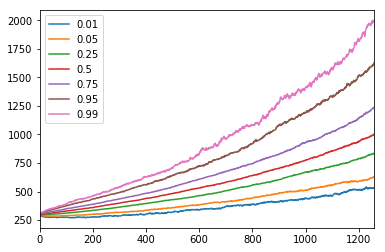

In [88]:
st = Stock('spy',share_price=298.46, expected_growth=0.001, vol=0.008)
st.get_price_paths(1000, periods=252*5)
pd.DataFrame(st._price_paths).quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]).T.plot()


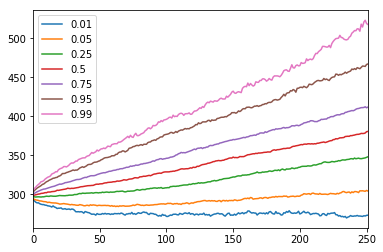

In [74]:
import quandl
import numpy as np
import matplotlib.pyplot as plt

start = "2016-01-01"
end = "2016-12-31"

df = quandl.get("WIKI/AMZN", start_date = start, end_date = end)

print(df.head())  # taking a look at the first 5 rows

LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Quandl account and then include your API key with your requests.

In [104]:
!pip install --pre fecon235

  Could not find a version that satisfies the requirement fecon235 (from versions: )
No matching distribution found for fecon235
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [100]:
import fecon236

In [103]:
!pip install fecon235

  Could not find a version that satisfies the requirement fecon235 (from versions: )
No matching distribution found for fecon235
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [107]:
fecon236.groupcotr()

AttributeError: module 'fecon236' has no attribute 'host'

In [ ]:
fecon236.boltz.boltzportfolio()

In [92]:
quandl.get("YALE/SPCOMP", rows=10)

LimitExceededError: (Status 429) (Quandl Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Quandl account and then include your API key with your requests.

In [ ]:
# mu, sigma, distribution?
# start_dt, end_dt, trading days ('B' - business days in pandas)
# start_price

# def _generate_returns(mu, sigma, distribution?, date_range)
# def _generate_price_path(start_price, returns)
# def generate_price_paths(how_many, start_price, mu, sigma, date_range)
# def plot_price_paths(price_paths)

In [110]:
fecon236.tool??

In [108]:
print(fecon236.map)

Annotated tree map of package directory [with module aliases]
    fecon236
    ├── __init__.py   (Router, sole non-empty __init__.py file herein)
    ├── tool.py       (Tools, low-level essentials)
    ├── top.py        (Top priority, experimental)
    ├── boots   (Bootstrap)
    │   └── bootstrap.py   [bs]
    ├── dst   (Distributions)
    │   └── gaussmix.py   [gmix]
    ├── econ
    │   └── infl.py
    ├── futures
    │   └── cftc.py
    ├── host
    │   ├── fred.py
    │   ├── hostess.py
    │   ├── qdl.py
    │   ├── _ex_Quandl.py
    │   └── stock.py
    ├── math
    │   └── matrix.py   [mat]
    ├── ml   (Machine Learning)
    │   └── learn.py
    ├── oc   (Optimization Control)
    │   └── optimize.py   [op]
    ├── parse
    │   └── sec.py
    ├── prob   (Probability)
    │   └── sim.py   (Simulation)
    ├── prtf   (Porfolio theory)
    │   └── boltzmann.py   [boltz]
    ├── rates  (Fixed Income)
    │   ├── credit.py
    │   └── fedfunds.py
    ├── tsa    (Time Series Analys